In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD ,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/classification-test-file/Classification_Test_file.csv
/kaggle/input/creditcardfraud/creditcard.csv


# **Obtain the Data Set**

In [2]:
creditCard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditCard.sample(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169499,119733.0,-2.714988,-8.662736,-5.129457,1.378790,-2.072669,0.406339,3.538410,-0.981983,-1.444830,...,1.299957,-1.467331,-2.249509,0.378095,-0.631746,0.534252,-0.588391,0.356554,2567.34,0
91612,63554.0,-1.022145,1.078634,0.577622,-0.074914,0.246215,0.203014,0.145808,0.444037,0.198761,...,-0.049510,0.043656,-0.199225,-0.948054,0.083931,0.430385,-0.022372,0.118193,3.99,0
248528,153984.0,-1.691518,2.089694,-0.724885,-0.867975,-0.181187,-1.182018,0.614008,0.299500,0.932546,...,-0.401211,-0.694477,0.180067,-0.042194,-0.173106,0.172855,0.755212,0.425558,13.86,0
33473,37247.0,1.085291,-0.099934,1.384736,1.373597,-0.987740,0.075023,-0.656055,0.230403,0.923224,...,-0.017387,0.169467,0.069608,0.400284,0.285550,-0.398529,0.086772,0.037520,9.99,0
30574,35989.0,-1.682446,-0.767810,2.795053,1.320910,1.234832,1.187868,-1.146523,0.929412,0.342899,...,0.111515,0.322400,0.144591,-0.644820,-0.062553,-0.212045,0.155393,0.101842,1.00,0
266296,162273.0,0.078289,-4.227353,-1.679742,0.374266,-1.914169,0.349223,0.423329,-0.126934,-0.248231,...,-0.125252,-2.185312,-0.312785,0.734220,-1.158504,-0.017474,-0.225721,0.134259,1043.52,0
137262,82088.0,1.046130,-1.270567,0.676275,-0.751542,-1.326137,0.280222,-1.095515,0.260980,-0.511221,...,0.511301,1.073334,-0.234971,-0.271245,0.285742,-0.028544,0.017652,0.030853,149.00,0
167535,118740.0,-0.580845,0.994100,-2.641655,-2.114119,3.181977,2.762941,0.845045,0.975694,-0.659490,...,0.294220,0.796624,-0.042494,0.752628,-0.234487,0.102780,0.179597,0.179255,38.52,0
56437,47426.0,0.800442,-1.252205,1.094588,0.623545,-1.865902,-0.370191,-0.686096,0.163629,1.785389,...,0.063924,0.022568,-0.180673,0.779669,0.172669,1.164444,-0.075599,0.041924,202.00,0
24988,33468.0,-2.300903,-1.294934,2.013168,0.911917,0.203026,0.380063,-1.308802,1.133873,-0.217342,...,0.482738,0.656399,-0.040073,-0.240699,-0.074669,0.816282,-0.029706,-0.259915,83.60,0


# **Exploring the Data Set**

In [5]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print(f"The Data Set contain {creditCard.shape[0]} Rows & {creditCard.shape[1]} Columns")
print(f"The Data Set contain {creditCard.duplicated().sum()} record duplicated") # Flag Here
print(f"Number of Nulls in each features :\n{creditCard.isna().sum()}")

The Data Set contain 284807 Rows & 31 Columns
The Data Set contain 1081 record duplicated
Number of Nulls in each features :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Imbalanced Features Resolving** Adham Trial

In [8]:
X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

print(X_train.shape , y_train.shape)

(454904, 30) (454904,)


# **Modeling Our Data**

## **Neural Networks**

**1st Trial**

* I've Used 3 Hidden Layers with ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**2nd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score (0.99851)
* --------------------------------------------------------------------------------------
**3rd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
--------------------------------------------------------------------------------------
**4th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**5th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score ()
-------------------------------------------------------------------------------------
**6th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score ()
-------------------------------------------------------------------------------------
**7th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**8th Trial**

* I've Used 3 Hidden Layers with (128 , 64 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**9th Trial**

* I've Used 3 Hidden Layers with (64 , 32 , 16)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**10th Trial**

* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
-------------------------------------------------------------------------------------
**10th Trial**

* I've Used 3 Hidden Layers with (48 , 24 , 12)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **SGD** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (0.977)
-------------------------------------------------------------------------------------
> I will Use Early Stopping on the 3 hidden layers (48 , 24 , 12) with Adam Optimizer ~ I got 0.9877850 as F1 Score my patience was 5 epochs without improvment
-------------------------------------------------------------------------------------
> I will Use Early Stopping on the 3 hidden layers (48 , 24 , 12) with Adam Optimizer ~ I got undefined as F1 Score my patience was 10 epochs without improvment

In [9]:
len(np.unique(y_train))

2

In [10]:
'''
modelAdam = Sequential()
modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))  
modelAdam.add(Dense(24, activation='relu')) 
modelAdam.add(Dense(12, activation='relu'))  
modelAdam.add(Dense(2, activation='softmax'))

early_stopping = EarlyStopping(
    monitor='val_accuracy',   
    patience=5,               
    restore_best_weights=True 
)

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005), 
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

history = modelAdam.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=50, 
    batch_size=32, 
    verbose=1,
    callbacks=[early_stopping] 
)
if early_stopping.stopped_epoch > 0:
    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")
    print("Restoring the best model weights.")
else:
    print("Training completed without early stopping.")

best_weights = modelAdam.get_weights()

print("Best weights restored.")

modelAdam.save_weights("best_model.weights.h5")
'''

'\nmodelAdam = Sequential()\nmodelAdam.add(Dense(48, input_dim=X_train.shape[1], activation=\'relu\'))  \nmodelAdam.add(Dense(24, activation=\'relu\')) \nmodelAdam.add(Dense(12, activation=\'relu\'))  \nmodelAdam.add(Dense(2, activation=\'softmax\'))\n\nearly_stopping = EarlyStopping(\n    monitor=\'val_accuracy\',   \n    patience=5,               \n    restore_best_weights=True \n)\n\nmodelAdam.compile(\n    optimizer=Adam(learning_rate=0.0005), \n    loss=\'sparse_categorical_crossentropy\',  \n    metrics=[\'accuracy\']\n)\n\nhistory = modelAdam.fit(\n    X_train, y_train, \n    validation_data=(X_val, y_val),\n    epochs=50, \n    batch_size=32, \n    verbose=1,\n    callbacks=[early_stopping] \n)\nif early_stopping.stopped_epoch > 0:\n    print(f"Training stopped at epoch {early_stopping.stopped_epoch + 1} due to no improvement in validation accuracy.")\n    print("Restoring the best model weights.")\nelse:\n    print("Training completed without early stopping.")\n\nbest_weights 

In [11]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',   
    patience=10,              
    restore_best_weights=True 
)

model_checkpoint = ModelCheckpoint(
    'final_epoch.weights.h5', 
    save_weights_only=True,
    save_best_only=False      
)

modelAdam = Sequential()
modelAdam.add(Dense(48, input_dim=X_train.shape[1], activation='relu'))  
modelAdam.add(Dense(24, activation='relu')) 
modelAdam.add(Dense(12, activation='relu'))  
modelAdam.add(Dense(2, activation='softmax'))

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005), 
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

history = modelAdam.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,               
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1734583784.275934     985 service.cc:145] XLA service 0x7a356800a850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734583784.275984     985 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734583784.275989     985 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  108/14216 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.7603 - loss: 0.5431 

I0000 00:00:1734583785.658005     985 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9773 - loss: 0.0657 - val_accuracy: 0.9968 - val_loss: 0.0126
Epoch 2/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9981 - loss: 0.0077 - val_accuracy: 0.9991 - val_loss: 0.0040
Epoch 3/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 4/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 5/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 6/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 7/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9995 - lo

In [12]:
val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
val_f1 = f1_score(y_val, val_predictions, average='macro')
print(f"Validation F1 Score after training: {val_f1:.6f}")

if val_f1 < 1.000:
    print("Restoring final epoch weights to achieve F1 score of 1.000.")
    modelAdam.load_weights('final_epoch.weights.h5')
    val_predictions = np.argmax(modelAdam.predict(X_val), axis=1)
    val_f1 = f1_score(y_val, val_predictions, average='macro')
    print(f"Validation F1 Score after restoring final weights: {val_f1:.6f}")

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after training: 0.999754
Restoring final epoch weights to achieve F1 score of 1.000.
3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Validation F1 Score after restoring final weights: 0.999736


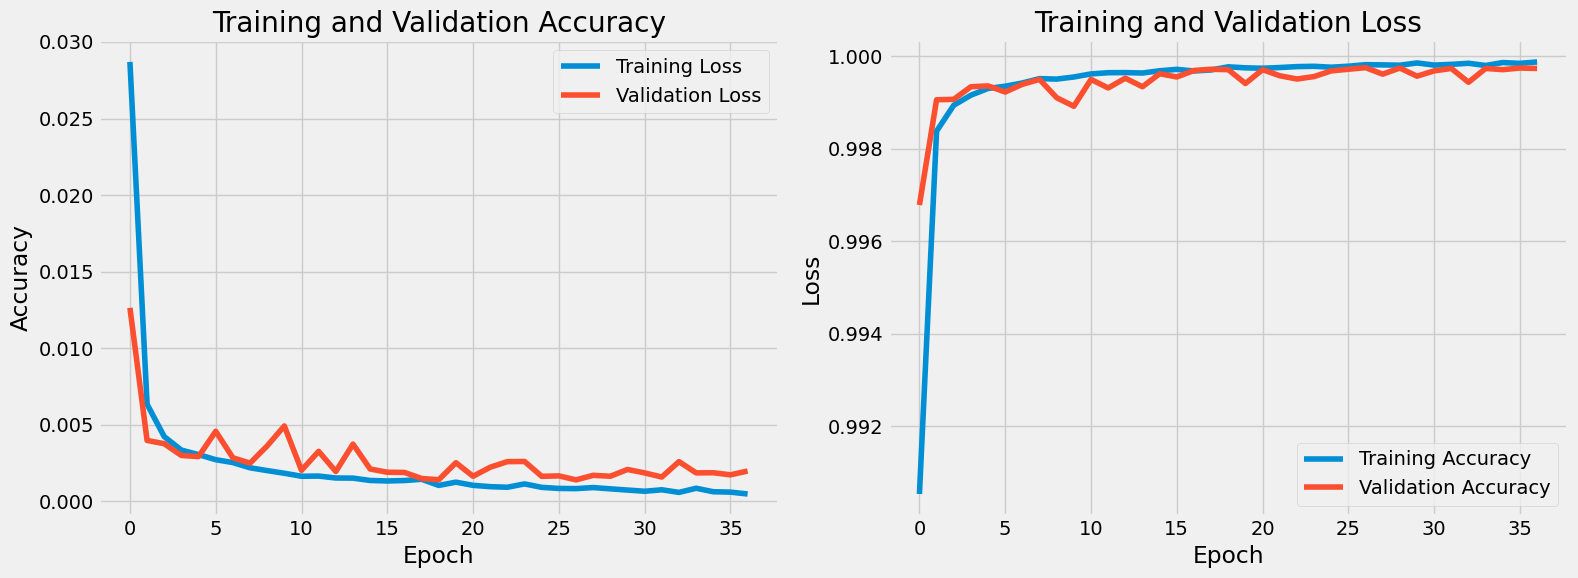

In [13]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("training_validation_plots.png")
plt.show()

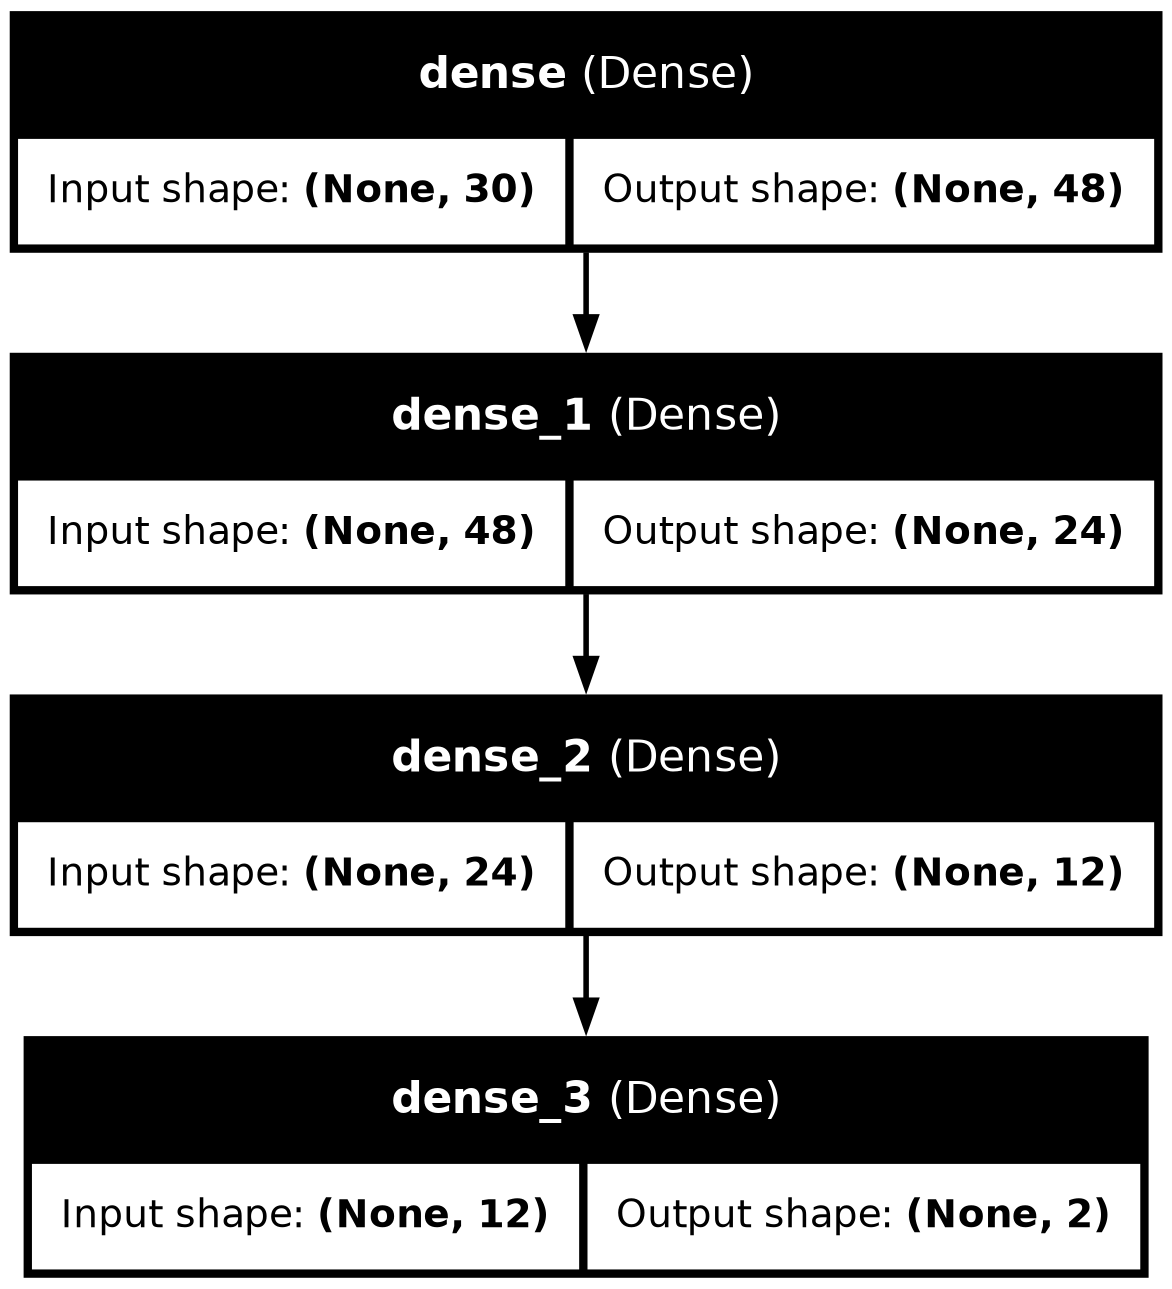

In [14]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [17]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Final 3 Layers 37ep ADAM.csv", index=False)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [16]:
# !rm -rf /kaggle/working/*